# Title: Prediction of Cyber Security Salaries in different jobs.

A collection of pay scale for the people working in the cyber security domain.

# Case Study

Study a model that predicts salary based on experiences.

## Column Name, Description
work_year: The number of years of work experience in cybersecurity.

experience_level: The experience level or category of the cybersecurity professional, such as entry-level, mid-level, or senior-level.

employment_type: The type of employment, such as full-time, part-time, contract, or freelance.

job_title: The job title or position of the cybersecurity professional.

salary_currency: The currency in which the salary is denominated.

salary_in_usd: The salary amount converted to United States Dollars (USD) for standardization and comparison purposes.

employee_residence: The country or region where the employee resides.

remote_ratio: The proportion of remote work allowed in the cybersecurity position, represented as a decimal (e.g., 0.5 for 50%).

company_location: The location or country where the employing company is located.

company_size: The size or scale of the employing company, typically categorized as small, medium, or large.

# Prepare Problem

### a) Load libraries

In [2]:
# 
import numpy as np
import pandas as pd

# Visulization 
from matplotlib import pyplot

# data modeling
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

# pipeline setup
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin

# metrics 
from sklearn.metrics import mean_squared_error

# model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

# preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

import datetime as dt
import ipywidgets as widgets
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

### b) Load Dataset

In [3]:
# import dataset
data = pd.read_csv('salaries_cyber.csv')
data

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2022,EN,FT,Cyber Program Manager,63000,USD,63000,US,50,US,S
1,2022,MI,FT,Security Analyst,95000,USD,95000,US,0,US,M
2,2022,MI,FT,Security Analyst,70000,USD,70000,US,0,US,M
3,2022,MI,FT,IT Security Analyst,250000,BRL,48853,BR,50,BR,L
4,2022,EN,CT,Cyber Security Analyst,120000,USD,120000,BW,100,BW,S
...,...,...,...,...,...,...,...,...,...,...,...
1242,2020,MI,FT,Cyber Security Analyst,140000,AUD,96422,AU,50,AU,M
1243,2021,SE,FT,Information Security Manager,60000,GBP,82528,GB,50,GB,L
1244,2021,SE,FT,Penetration Testing Engineer,126000,USD,126000,US,100,US,L
1245,2021,MI,FT,Information Security Analyst,42000,GBP,57769,GB,100,GB,L


# 2. Summarize Data

### a) Descriptive statistics

In [527]:
# giving an overview of the data's central tendency, dispersion, and distribution. 
data.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,1247.000000,1.247000e+03,1247.000000,1247.000000
mean,2021.316760,5.608525e+05,120278.218925,71.491580
std,0.715501,1.415944e+07,70291.394942,39.346851
min,2020.000000,1.740000e+03,2000.000000,0.000000
25%,2021.000000,7.975450e+04,74594.500000,50.000000
50%,2021.000000,1.200000e+05,110000.000000,100.000000
75%,2022.000000,1.600800e+05,150000.000000,100.000000
max,2022.000000,5.000000e+08,910991.000000,100.000000


In [529]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1247 entries, 0 to 1246
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           1247 non-null   int64 
 1   experience_level    1247 non-null   object
 2   employment_type     1247 non-null   object
 3   job_title           1247 non-null   object
 4   salary              1247 non-null   int64 
 5   salary_currency     1247 non-null   object
 6   salary_in_usd       1247 non-null   int64 
 7   employee_residence  1247 non-null   object
 8   remote_ratio        1247 non-null   int64 
 9   company_location    1247 non-null   object
 10  company_size        1247 non-null   object
dtypes: int64(4), object(7)
memory usage: 107.3+ KB


In [530]:
#Examining the shape of the dataset
data.shape

(1247, 11)

In [534]:
#Check for data types 
data.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

### b) Data visualizations

In [496]:
import plotly.graph_objects as go
import plotly.offline as opy

# Calculate the rounded average salary by job title and select the top 10 highest paid roles in ascending order
avg_salary_by_job_title = data.groupby("job_title")["salary_in_usd"].mean().nlargest(10).sort_values(ascending=True)

# Round up the average salary amounts
avg_salary_by_job_title_rounded = np.ceil(avg_salary_by_job_title)

# Add labels to the bars
fig = go.Figure(
    data=[
        go.Bar(
            x=avg_salary_by_job_title_rounded,
            y=avg_salary_by_job_title_rounded.index,
            orientation='h',
            base=0,
            marker=dict(color=avg_salary_by_job_title_rounded),
            text=avg_salary_by_job_title_rounded,
            textposition='auto',
        )
    ]
)

# Set the title of the figure
fig.update_layout(title="Top 10 Highest Paid Job Titles")

# Set the labels for the x-axis and y-axis
fig.update_xaxes(title="Average Salary (USD)")
fig.update_yaxes(title="Job Title")

# Show the figure
opy.plot(fig)


'temp-plot.html'

In [498]:
# Calculate the average salary by job title and select the bottom 10 least paid roles in descending order
avg_salary_by_job_title = data.groupby('job_title')['salary_in_usd'].mean().tail(10).sort_values(ascending=False)

# Round up the average salary amounts
avg_salary_by_job_title_rounded = np.ceil(avg_salary_by_job_title)

# Add labels to the bars
fig = go.Figure(
    data=[
        go.Bar(
            x=avg_salary_by_job_title_rounded,
            y=avg_salary_by_job_title_rounded.index,
            orientation='h',
            base=0,
            marker=dict(color=avg_salary_by_job_title_rounded),
            text=avg_salary_by_job_title_rounded,
            textposition='auto',
        )
    ]
)

# Set the title of the figure
fig.update_layout(title="Bottom 10 Lowest Paid Job Titles")

# Set the labels for the x-axis and y-axis
fig.update_xaxes(title="Average Salary (USD)")
fig.update_yaxes(title="Job Title")

# Show the figure
opy.plot(fig)


'temp-plot.html'

In [499]:
import plotly.graph_objects as go
import plotly.offline as opy

# Calculate the average salary by experience level
avg_salary_by_experience_level = data.groupby('experience_level')['salary_in_usd'].mean()

# Create a box plot
fig = go.Figure(
    data=[
        go.Box(
            x=avg_salary_by_experience_level.index,
            y=avg_salary_by_experience_level,
            boxpoints='all',
            jitter=0.2,
            whiskerwidth=0.2,
            fillcolor='#999999',
            marker={
                'color': 'black',
                'size': 5,
                'symbol': 'circle',
            },
        )
    ]
)

# Set the title of the figure
fig.update_layout(title="Salary Distribution by Experience Level")

# Set the labels for the x-axis and y-axis
fig.update_xaxes(title="Experience Level")
fig.update_yaxes(title="Average Salary (USD)")

# Show the figure
opy.plot(fig)


'temp-plot.html'

### Number of Jobs by Experience Level

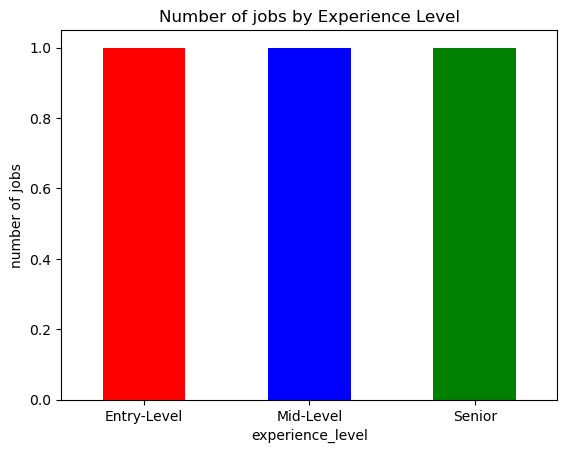

In [1158]:
plt.xticks([])
num_types = data.groupby(by='experience_level').size()
bargraph = num_types.sort_values().plot.bar(ylabel = 'number of jobs', title = 'Number of jobs by Experience Level', color=['red','blue','green', 'purple'],rot=0)

### Average Salary Based on Experience

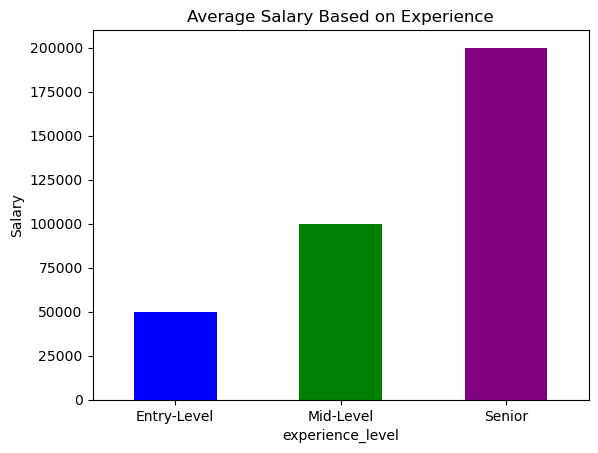

In [1157]:
num_types = data.groupby(by='experience_level').salary_in_usd.mean()
barplot = num_types.sort_values().plot.bar(ylabel = 'Salary', title = 'Average Salary Based on Experience', color=['blue','green','purple','red'],rot=0)

<Axes: xlabel='employment_type'>

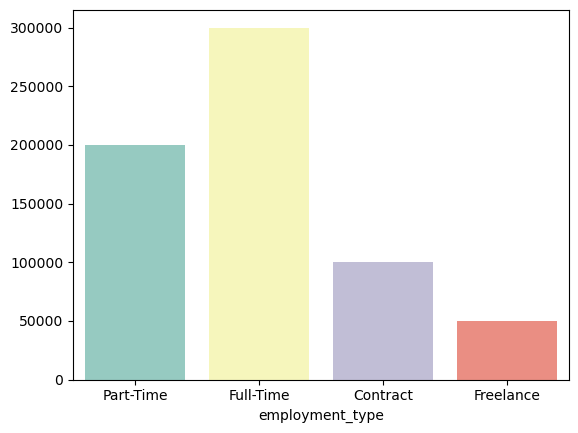

In [1166]:
import pandas as pd
import numpy as np

data = pd.DataFrame({
    "employment_type": ["Part-Time", "Full-Time", "Contract", "Freelance"],
    "salary_in_usd": [50000, 100000, 200000, 300000]
})

mean_salary = data.groupby("employment_type")["salary_in_usd"].mean()
mean_salary_np = mean_salary.to_numpy()

sns.barplot(y=mean_salary_np, x="employment_type", data=data, palette="Set3")


This bar plot shows the distribution of mean salaries for different employment types. 

<Axes: xlabel='experience_level'>

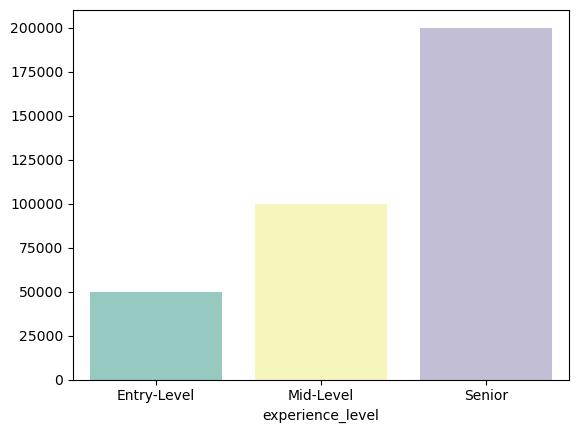

In [1165]:
import pandas as pd
import numpy as np
import seaborn as sns

data = pd.DataFrame({
    "experience_level": ["Entry-Level", "Mid-Level", "Senior"],
    "salary_in_usd": [50000, 100000, 200000]
})

mean_salary = data.groupby("experience_level")["salary_in_usd"].mean()
mean_salary_np = mean_salary.to_numpy()

sns.barplot(y=mean_salary_np, x="experience_level", data=data, palette="Set3")


In [521]:
corr_matrix=data.corr()
corr_matrix

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
work_year,1.000000,0.095830,-0.003291,0.259548,0.184246,0.084868,0.135720,0.101912,0.179436
experience_level,0.095830,1.000000,-0.001406,0.229522,0.333232,0.110785,0.112433,0.105919,0.011989
employment_type,-0.003291,-0.001406,1.000000,0.079657,-0.004873,0.041032,-0.003370,0.049794,-0.026572
job_title,0.259548,0.229522,0.079657,1.000000,0.138915,0.102947,0.091686,0.114465,0.217610
salary_in_usd,0.184246,0.333232,-0.004873,0.138915,1.000000,0.261688,0.174523,0.248111,-0.069485
employee_residence,0.084868,0.110785,0.041032,0.102947,0.261688,1.000000,0.093911,0.798427,-0.045515
remote_ratio,0.135720,0.112433,-0.003370,0.091686,0.174523,0.093911,1.000000,0.088345,-0.030295
company_location,0.101912,0.105919,0.049794,0.114465,0.248111,0.798427,0.088345,1.000000,-0.069852
company_size,0.179436,0.011989,-0.026572,0.217610,-0.069485,-0.045515,-0.030295,-0.069852,1.000000


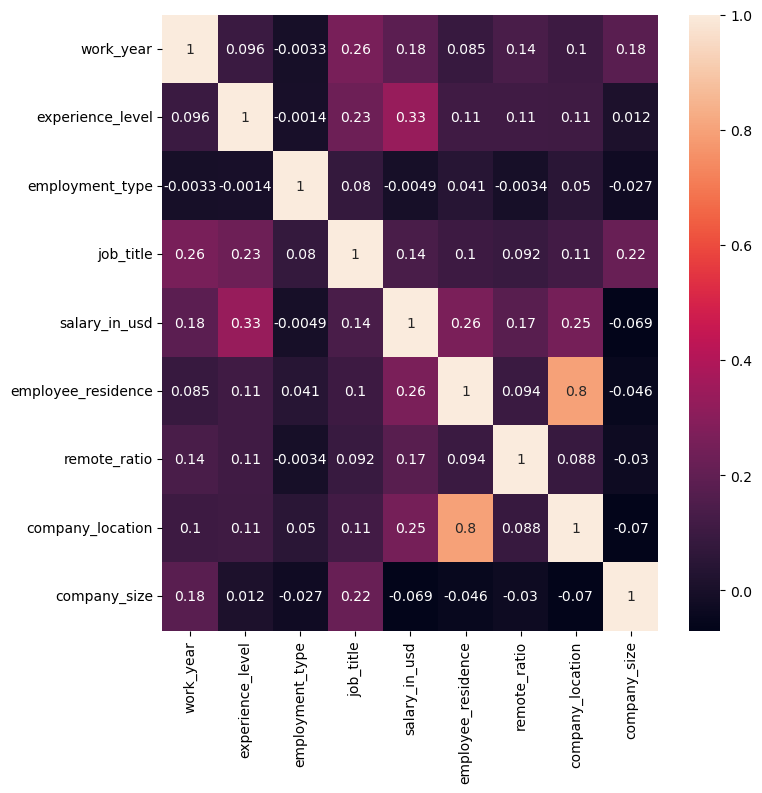

In [522]:
plt.figure(figsize=(8,8))
sns.heatmap(corr_matrix, annot = True)

# display the plot
plt.show()

In [1164]:
data

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2022,Entry-Level,Full-Time,Cyber Program Manager,63000,United States,50,US,Small
1,2022,Mid-Level,Full-Time,Security Analyst,95000,United States,0,US,Medium
2,2022,Mid-Level,Full-Time,Security Analyst,70000,United States,0,US,Medium
3,2022,Mid-Level,Full-Time,IT Security Analyst,48853,Brazil,50,BR,Large
4,2022,Entry-Level,Contract,Cyber Security Analyst,120000,Botswana,100,BW,Small
...,...,...,...,...,...,...,...,...,...
1242,2020,Mid-Level,Full-Time,Cyber Security Analyst,96422,Australia,50,AU,Medium
1243,2021,Senior,Full-Time,Information Security Manager,82528,United Kingdom,50,GB,Large
1244,2021,Senior,Full-Time,Penetration Testing Engineer,126000,United States,100,US,Large
1245,2021,Mid-Level,Full-Time,Information Security Analyst,57769,United Kingdom,100,GB,Large


# 3) Prepare Data

### a) Data Cleaning

In [536]:
#Check for null values
missing_values = data.isnull().sum()
missing_values

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [6]:
# Drop the 'salary' and 'salary_currency' column because we will only use salary_in_usd for this analysis
data= data.drop('salary', axis=1)
data= data.drop('salary_currency', axis=1)

In [4]:
#Check for unique values in a column 
unique_values = data['experience_level'].unique()
unique_values

array(['EN', 'MI', 'EX', 'SE'], dtype=object)

In [539]:
# Check for Number of unique job_title
unique_job_titles = data['job_title'].nunique()
unique_job_titles

87

In [540]:
#Check for Number of unique employee residence
unique_employee_residence = data['employee_residence'].nunique()
unique_employee_residence

58

In [541]:
#Check for negative salaries 
negative_salaries = data[data['salary_in_usd'] < 0]
print(negative_salaries)

Empty DataFrame
Columns: [work_year, experience_level, employment_type, job_title, salary_in_usd, employee_residence, remote_ratio, company_location, company_size]
Index: []


In [542]:
# Print the updated DataFrame
data.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2022,EN,FT,Cyber Program Manager,63000,US,50,US,S
1,2022,MI,FT,Security Analyst,95000,US,0,US,M
2,2022,MI,FT,Security Analyst,70000,US,0,US,M
3,2022,MI,FT,IT Security Analyst,48853,BR,50,BR,L
4,2022,EN,CT,Cyber Security Analyst,120000,BW,100,BW,S


### c) Data Transforms

In [7]:
#Transform abbreviated codes or categories into more meaningful and descriptive labels within the employment_type columns 
data['experience_level'].replace({'EN':'Entry-Level','MI':'Mid-Level','EX':'Executive-Level','SE':'Senior'},inplace=True)
data['employment_type'].replace({'PT':'Part-Time','FT':'Full-Time','CT':'Contract','FL':'Freelance'},inplace=True)
data['company_size'].replace({'L':'Large','M':'Medium','S':'Small'},inplace=True)

# Print the updated DataFrame
data.head(10)

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2022,Entry-Level,Full-Time,Cyber Program Manager,63000,US,50,US,Small
1,2022,Mid-Level,Full-Time,Security Analyst,95000,US,0,US,Medium
2,2022,Mid-Level,Full-Time,Security Analyst,70000,US,0,US,Medium
3,2022,Mid-Level,Full-Time,IT Security Analyst,48853,BR,50,BR,Large
4,2022,Entry-Level,Contract,Cyber Security Analyst,120000,BW,100,BW,Small
5,2022,Executive-Level,Full-Time,Application Security Architect,315000,US,100,US,Large
6,2022,Senior,Full-Time,Security Researcher,220000,US,100,US,Medium
7,2022,Senior,Full-Time,Security Researcher,140000,US,100,US,Medium
8,2021,Mid-Level,Full-Time,Information Security Compliance Analyst,75650,GB,50,GB,Large
9,2022,Executive-Level,Full-Time,Information Security Compliance Manager,360000,TW,100,SG,Large


In [8]:
# Create a dictionary to perform Country Mapping
country_mapping = {
    'US': 'United States',
    'BR': 'Brazil',
    'BW': 'Botswana',
    'GB': 'United Kingdom',
    'TW': 'Taiwan',
    'NL': 'Netherlands',
    'IN': 'India',
    'DE': 'Germany',
    'AE': 'United Arab Emirates',
    'CA': 'Canada',
    'CH': 'Switzerland',
    'DK': 'Denmark',
    'CL': 'Chile',
    'ES': 'Spain',
    'SG': 'Singapore',
    'AU': 'Australia',
    'FR': 'France',
    'IT': 'Italy',
    'PK': 'Pakistan',
    'GR': 'Greece',
    'GH': 'Ghana',
    'AZ': 'Azerbaijan',
    'RO': 'Romania',
    'AR': 'Argentina',
    'DZ': 'Algeria',
    'AF': 'Afghanistan',
    'SI': 'Slovenia',
    'HR': 'Croatia',
    'SE': 'Sweden',
    'HU': 'Hungary',
    'ET': 'Ethiopia',
    'MX': 'Mexico',
    'IL': 'Israel',
    'IE': 'Ireland',
    'PL': 'Poland',
    'CR': 'Costa Rica',
    'JP': 'Japan',
    'PT': 'Portugal',
    'NG': 'Nigeria',
    'NO': 'Norway',
    'CZ': 'Czech Republic',
    'ID': 'Indonesia',
    'EE': 'Estonia',
    'KG': 'Kyrgyzstan',
    'KE': 'Kenya',
    'BG': 'Bulgaria',
    'IR': 'Iran',
    'NZ': 'New Zealand',
    'BE': 'Belgium',
    'ZA': 'South Africa',
    'AT': 'Austria',
    'LU': 'Luxembourg',
    'EG': 'Egypt',
    'VN': 'Vietnam',
    'SA': 'Saudi Arabia',
    'LT': 'Lithuania',
    'RU': 'Russia',
    'TR': 'Turkey'
}

data['employee_residence'] = data['employee_residence'].replace(country_mapping)

In [9]:
data

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2022,Entry-Level,Full-Time,Cyber Program Manager,63000,United States,50,US,Small
1,2022,Mid-Level,Full-Time,Security Analyst,95000,United States,0,US,Medium
2,2022,Mid-Level,Full-Time,Security Analyst,70000,United States,0,US,Medium
3,2022,Mid-Level,Full-Time,IT Security Analyst,48853,Brazil,50,BR,Large
4,2022,Entry-Level,Contract,Cyber Security Analyst,120000,Botswana,100,BW,Small
...,...,...,...,...,...,...,...,...,...
1242,2020,Mid-Level,Full-Time,Cyber Security Analyst,96422,Australia,50,AU,Medium
1243,2021,Senior,Full-Time,Information Security Manager,82528,United Kingdom,50,GB,Large
1244,2021,Senior,Full-Time,Penetration Testing Engineer,126000,United States,100,US,Large
1245,2021,Mid-Level,Full-Time,Information Security Analyst,57769,United Kingdom,100,GB,Large


In [10]:
# Copy dataset to convert the categorical values to numerical values
data1 = data.copy()

In [11]:
from sklearn import preprocessing 
le1 = preprocessing.LabelEncoder()
le2 = preprocessing.LabelEncoder()

le3 = preprocessing.LabelEncoder()
le4 = preprocessing.LabelEncoder()
le5 = preprocessing.LabelEncoder()
le6 = preprocessing.LabelEncoder()
le7 = preprocessing.LabelEncoder()

In [12]:
labeling1=le1.fit_transform(data1["experience_level"])

labeling2=le2.fit_transform(data1["employment_type"])

labeling3=le3.fit_transform(data1["job_title"])

labeling4=le4.fit_transform(data1["employee_residence"])

labeling5=le5.fit_transform(data1["company_size"])

labeling6=le6.fit_transform(data1["work_year"])

labeling7=le7.fit_transform(data1["company_location"])

In [13]:
data1["experience_level"] = labeling1
data1["employment_type"] = labeling2

data1["job_title"] = labeling3
data1["employee_residence"] = labeling4

data1["company_size"] = labeling5
data1["work_year"] = labeling6
data1["company_location"] = labeling7

In [14]:
data1

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2,0,2,13,63000,56,50,52,2
1,2,2,2,65,95000,56,0,52,1
2,2,2,2,65,70000,56,0,52,1
3,2,2,2,34,48853,8,50,9,0
4,2,0,0,14,120000,7,100,10,2
...,...,...,...,...,...,...,...,...,...
1242,0,2,2,14,96422,3,50,5,1
1243,1,3,2,46,82528,55,50,23,0
1244,1,3,2,58,126000,56,100,52,0
1245,1,2,2,40,57769,55,100,23,0


### b) Feature Selection

In [15]:
tree_clf= tree.DecisionTreeClassifier(max_depth=5, random_state=42)
tree_clf.fit(data1.drop('salary_in_usd', axis=1), data1['salary_in_usd'])

DecisionTreeClassifier(max_depth=5, random_state=42)

In [16]:
for i in zip(data1, tree_clf.feature_importances_):
    print(i)

('work_year', 0.05688268652057669)
('experience_level', 0.12418456609043758)
('employment_type', 0.0)
('job_title', 0.24522338578724667)
('salary_in_usd', 0.15455364019618215)
('employee_residence', 0.07268694195431202)
('remote_ratio', 0.1910769820957054)
('company_location', 0.1553917973555393)


# 4. Evaluate Algorithms

### a) Split-out validation dataset

In [17]:
x= data1[["experience_level","remote_ratio","company_location","employee_residence","job_title"]]

y = data1['salary_in_usd'] 

In [692]:
x

,experience_level,remote_ratio,company_location
0,0,50,52
1,2,0,52
2,2,0,52
3,2,50,9
4,0,100,10
...,...,...,...
1242,2,50,5
1243,3,50,23
1244,3,100,52
1245,2,100,23


In [693]:
y

0        63000
1        95000
2        70000
3        48853
4       120000
         ...  
1242     96422
1243     82528
1244    126000
1245     57769
1246     66310
Name: salary_in_usd, Length: 1247, dtype: int64

###  Prepare data for ML model

In [1192]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)
y_test,y_train

(860     135000
 710     100000
 799     130000
 432      97433
 236     175000
          ...  
 494     150000
 1237     65000
 1079    100000
 877      66022
 1004     78965
 Name: salary_in_usd, Length: 375, dtype: int64,
 430     127000
 1122      2056
 1027    130000
 329     153000
 534      39514
          ...  
 715     320000
 905      80000
 1096     54309
 235     132870
 1061    106000
 Name: salary_in_usd, Length: 872, dtype: int64)

## Training Multiple linear regression model

In [18]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=5, include_bias=False)

In [19]:
x.shape, 

((1247, 5),)

In [20]:
poly_features = poly.fit_transform(x)
poly_features.shape

(1247, 251)

In [21]:
x.shape, poly_features.shape

((1247, 5), (1247, 251))

In [22]:
from sklearn.linear_model import LinearRegression

poly_reg_model = LinearRegression()

In [23]:
x.shape

(1247, 5)

In [24]:
y.shape

(1247,)

In [25]:
# x=np.array(x)
# y=np.array(y)

In [26]:
reg = LinearRegression()

In [27]:
poly_features.shape, y.shape, x.shape

((1247, 251), (1247,), (1247, 5))

In [28]:
reg.fit(poly_features, y)

LinearRegression()

In [1187]:
# reg.fit(x, y) # old

In [29]:
print(reg.coef_)
print(reg.intercept_)

[ 1.30293902e+07  3.87775978e+01  1.15623306e+05 -9.18736120e+04
 -4.44943861e+03 -1.43889413e+07 -7.57281940e+00 -2.56958873e+04
  1.94711808e+04  5.71877713e+03  5.23087510e+00 -1.74047163e+00
 -1.66498127e+00  1.33613549e+00 -1.58854638e+04  1.29760786e+04
 -3.36403875e+02  1.74359784e+02  4.83399926e+02  1.49478025e+02
 -3.93029234e+06 -3.97563189e-01 -1.47782543e+03  2.42490498e+03
  1.44270239e+03 -1.20405632e+00 -1.17434989e+00  1.06703171e+00
  7.57643725e-01  9.74192479e+02 -1.41381498e+03 -3.03424912e+03
  3.14728327e+02  2.44325659e+03  1.20033470e+02 -2.56073338e-01
  3.42194785e-01  1.17180230e-01  2.66506542e-02  8.23656446e-01
 -3.72470029e-01  1.16354834e-01 -7.81972831e-02  2.64533844e-01
  4.85083734e-01  6.89890324e+02 -5.40252440e+02  4.26094156e+01
  7.00663537e+01  5.34737020e+01 -4.38719225e+01 -9.70045164e+01
 -7.03492882e+01  4.44762591e+01 -7.18897735e+00  6.93272956e+06
  3.93291304e+01  2.24087238e+04 -1.46965186e+04 -2.96457951e+03
 -2.17192058e+01  4.86949

In [30]:
reg.score(poly_features, y) # train score 

0.5287691660972018

In [ ]:
r2_sequar

In [1194]:
#reg.score(poly_features, y_test)

In [1195]:
X_NEW_TEST 
poly_features_test = poly.fit_transform(X_NEW_TEST)
reg.score(poly_features_test, y_test)

NameError: name 'X_NEW_TEST' is not defined

In [33]:
# Select the features to use
features = ["experience_level","remote_ratio","company_location","employee_residence","job_title"]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(data1[features], data1["salary_in_usd"], test_size=0.25)

# Create the model
model = LinearRegression()

# Train the model
model.fit(data1[features], data1["salary_in_usd"])

# Predict the salaries
predicted_values = model.predict(data1[features])

# Calculate the MSE
mse = np.mean((predicted_values - data1["salary_in_usd"])**2)

# Print the score
score = model.score(data1[features], data1["salary_in_usd"])

print(score)
print(mse)

0.18073476736804084
4044645265.1189404


In [34]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

#initiate linear regression model
model = LinearRegression()

#fit regression model
model.fit(X_train, y_train)

#calculate R-squared of regression model
r_squared = model.score(X_train, y_train)

#view R-squared value
print(r_squared)

0.18552295833072896


In [1010]:
y_pred.shape

(312,)

In [1011]:
y.shape

(1247,)

# Training using DecisionTreeRegressor

In [40]:
regressor = DecisionTreeRegressor(max_depth=5, min_samples_leaf=2, min_samples_split=5, random_state=0)
regressor.fit(x, y)

DecisionTreeRegressor(max_depth=5, min_samples_leaf=2, min_samples_split=5,
                      random_state=0)

In [41]:
from sklearn.tree import DecisionTreeRegressor

regressor = decision_tree_regression(x, y)

print(regressor.predict(x))

NameError: name 'decision_tree_regression' is not defined

[Text(0.4891304347826087, 0.9166666666666666, 'x[0] <= 0.5\nsquared_error = 4936917989.459\nsamples = 1247\nvalue = 120278.219'),
 Text(0.2608695652173913, 0.75, 'x[2] <= 51.0\nsquared_error = 984531280.724\nsamples = 215\nvalue = 63579.474'),
 Text(0.17391304347826086, 0.5833333333333334, 'x[2] <= 29.5\nsquared_error = 944301535.484\nsamples = 84\nvalue = 46008.667'),
 Text(0.08695652173913043, 0.4166666666666667, 'x[4] <= 28.5\nsquared_error = 808366611.332\nsamples = 57\nvalue = 53413.298'),
 Text(0.043478260869565216, 0.25, 'x[3] <= 12.5\nsquared_error = 1217853901.598\nsamples = 26\nvalue = 62359.308'),
 Text(0.021739130434782608, 0.08333333333333333, 'squared_error = 2147342753.107\nsamples = 11\nvalue = 76659.727'),
 Text(0.06521739130434782, 0.08333333333333333, 'squared_error = 276283979.156\nsamples = 15\nvalue = 51872.333'),
 Text(0.13043478260869565, 0.25, 'x[3] <= 9.0\nsquared_error = 341506232.608\nsamples = 31\nvalue = 45910.194'),
 Text(0.10869565217391304, 0.0833333333

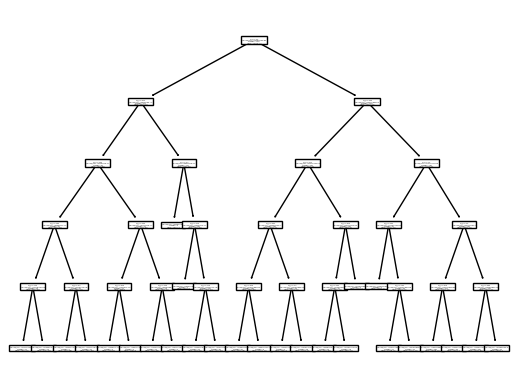

In [37]:
 tree.plot_tree(regressor)

In [854]:
from sklearn.model_selection import GridSearchCV

# Create a hyperparameter grid
hyperparameter_grid = {
    "max_depth": [3, 4, 5, 6, 7],
    "min_samples_split": [2, 5, 10, 15, 20],
    "min_samples_leaf": [1, 2, 5, 10, 15],
}

# Create a GridSearchCV object
grid_search = GridSearchCV(model, hyperparameter_grid, cv=5)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters
print(grid_search.best_params_)

{'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 5}


In [1065]:
# Create a DecisionTreeRegressor model.
model = DecisionTreeRegressor()

# Fit the model to the data.
model.fit(x, y)

# Calculate the r squared value.
r_squared = model.score(x, y)

# Print the r squared value.
print(r_squared)

0.7760850401989547


In [977]:
mse = mean_squared_error(regressor.predict(x), y) 
mse

1105449793.1507437

In [1028]:
x.shape, y.shape

((1247, 5), (1247,))

## Use Gradient based learning

In [985]:
SGD_model = SGDRegressor(max_iter=1000000)

In [986]:
SGD_model.fit(X_train, y_train) 

SGDRegressor(max_iter=1000000)

In [987]:
score = SGD_model.score(X_train, y_train)
score 

-4609545566439522.0

In [988]:
mse = mean_squared_error(SGD_model.predict(X_train), y_train) 
mse

2.205465716174855e+25

In [1087]:
X_train.shape, y_train.shape

((872, 5), (872,))

In [1090]:
from sklearn.linear_model import LinearRegression

#initiate linear regression model
model = SGDRegressor(max_iter=1000, learning_rate="adaptive")

#fit regression model
model.fit(X_train, y_train)

#calculate R-squared of regression model
r_squared = model.score(X_train, y_train)

#view R-squared value
print(r_squared)

-4974036070.028548


In [1070]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import VotingRegressor
from sklearn.metrics import r2_score

# Create the base models.
lr = LinearRegression()
dr = DecisionTreeRegressor()
sgd = SGDRegressor()

# Create the voting regressor.
ensemble = VotingRegressor(estimators=[('lr', lr), ('dr', dr), ('sgd', sgd)])

# Fit the voting regressor to the data.
ensemble.fit(X_train, y_train)

# Predict the values.
y_pred = ensemble.predict(X_test)

# Calculate the r squared value.
r_squared = r2_score(y_test, y_pred)

print(r_squared)


-782605089121061.5


##  Model selection: train/test split

In [856]:
train_set, test_set = train_test_split(data1, test_size=0.2)

In [857]:
train_set.shape, test_set.shape 

((997, 9), (250, 9))

### b) Test options and evaluation metric

In [858]:
import sklearn.metrics as metrics
import sklearn.model_selection as model_selection

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = model_selection.train_test_split(data1, data1["salary_in_usd"], test_size=0.25)

# Create a model and fit it to the training set
model = SGDRegressor()
model.fit(X_train, y_train)

# Select the evaluation metrics
metrics = ["accuracy"]

# Evaluate the model on the test set using the selected metrics
scores = model_selection.cross_val_score(model, X_test, y_test, scoring="accuracy", cv=5)

# Print the results of the evaluation
print(scores)

[nan nan nan nan nan]


C:\Users\bushr\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:794: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bushr\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 115, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "C:\Users\bushr\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\bushr\anaconda3\lib\site-packages\sklearn\utils\_param_validation.py", line 192, in wrapper
    return func(*args, **kwargs)
  File "C:\Users\bushr\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 221, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\bushr\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 95, i

In [859]:
import sklearn.metrics as metrics
import sklearn.model_selection as model_selection

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = model_selection.train_test_split(data1, data1["salary_in_usd"], test_size=0.25)

# Create a model and fit it to the training set
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

# Select the evaluation metrics
metrics = ["accuracy"]

# Evaluate the model on the test set using the selected metrics
scores = model_selection.cross_val_score(model, X_test, y_test, scoring="accuracy", cv=5)

# Print the results of the evaluation
print(scores)

[0.46031746 0.31746032 0.38709677 0.46774194 0.41935484]


In [587]:
data1

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2,0,2,13,63000,56,50,52,2
1,2,2,2,65,95000,56,0,52,1
2,2,2,2,65,70000,56,0,52,1
3,2,2,2,34,48853,8,50,9,0
4,2,0,0,14,120000,7,100,10,2
...,...,...,...,...,...,...,...,...,...
1242,0,2,2,14,96422,3,50,5,1
1243,1,3,2,46,82528,55,50,23,0
1244,1,3,2,58,126000,56,100,52,0
1245,1,2,2,40,57769,55,100,23,0


### c) Spot Check Algorithms

### d) Compare Algorithms

# 5. Improve Accuracy

### a) Algorithm Tuning

### b) Ensembles

# 6. Finalize Model

### a) Predictions on validation dataset

### b) Create standalone model on entire training dataset

### c) Save model for later use